# Phys 311 dielectric interface lab report

Here is the python package I used for this lab report:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
mpl.get_cachedir()

'C:\\Users\\alber\\.matplotlib'

1. Calucalte the angle of incidence $\theta$ = 180 $^\circ$ - $\beta$ /2

In [107]:
df = pd.read_csv('Dielectirc_interface.csv')
df["theta"] = 180 - df["deg"] / 2
print(df)


    deg     rui    ruo     rdi     rdo    gui    guo    gdi    gdo  theta
0   320  481.00   2.73  496.00    4.14  81.00   0.53  84.00   0.80   20.0
1   310  481.00   2.43  494.00    4.53  80.67   0.48  84.00   0.88   25.0
2   300  479.00   2.06  497.67    5.06  80.33   0.41  84.00   0.98   30.0
3   290  480.67   1.65  495.00    5.77  80.00   0.33  84.00   1.12   35.0
4   280  477.00   1.19  495.00    6.72  80.00   0.24  83.67   1.30   40.0
5   270  476.00   0.71  488.00    8.01  79.00   0.14  83.00   1.55   45.0
6   260  474.00   0.30  493.00    9.69  79.67   0.07  83.00   1.85   50.0
7   250  473.00   0.03  491.33   11.98  79.00   0.01  83.00   2.31   55.0
8   240  471.67   0.14  486.67   15.12  78.67   0.03  82.67   2.92   60.0
9   230  472.00   0.98  486.67   19.50  78.33   0.20  82.00   3.75   65.0
10  220  470.00   3.23  487.00   25.40  78.00   0.62  81.67   4.89   70.0
11  210  471.67   8.15  483.00   33.74  78.00   1.57  81.67   6.48   75.0
12  200  469.00  18.20  484.67   45.37

2. Divide each measurement by its reference measurement. Answers are unitless.

In [108]:
for col in df:
    if col[2] == "i":
        df["{}{}".format(col[0:2],"_rf_ratio")] = df["{}{}".format(col[0:2],"o")]/df[col]
df1 = df.iloc[:,9:]
print(df1)

    theta  ru_rf_ratio  rd_rf_ratio  gu_rf_ratio  gd_rf_ratio
0    20.0     0.005676     0.008347     0.006543     0.009524
1    25.0     0.005052     0.009170     0.005950     0.010476
2    30.0     0.004301     0.010167     0.005104     0.011667
3    35.0     0.003433     0.011657     0.004125     0.013333
4    40.0     0.002495     0.013576     0.003000     0.015537
5    45.0     0.001492     0.016414     0.001772     0.018675
6    50.0     0.000633     0.019655     0.000879     0.022289
7    55.0     0.000063     0.024383     0.000127     0.027831
8    60.0     0.000297     0.031068     0.000381     0.035321
9    65.0     0.002076     0.040068     0.002553     0.045732
10   70.0     0.006872     0.052156     0.007949     0.059875
11   75.0     0.017279     0.069855     0.020128     0.079344
12   80.0     0.038806     0.093610     0.044744     0.106972
13   90.0     0.163040     0.384048     0.186543     0.192000


3. Divide the each point with reference 90 $^\circ$ measurement. normalized reflectance at each angle to its value at 90 $^\circ$

In [109]:
for col in df1:
    if col[-1] == "o":
        new_col = "{}{}".format(col[0:2],"_nor_rf")
        df1[new_col] = df1[col].divide(df1.iloc[-1][col])
df2 = df1.iloc[:,5:]
print(df2) # normalized measuremnt

    ru_nor_rf  rd_nor_rf  gu_nor_rf  gd_nor_rf
0    0.034811   0.021734   0.035076   0.049603
1    0.030986   0.023877   0.031897   0.054563
2    0.026378   0.026474   0.027361   0.060764
3    0.021054   0.030352   0.022113   0.069444
4    0.015301   0.035349   0.016082   0.080923
5    0.009149   0.042739   0.009500   0.097264
6    0.003882   0.051179   0.004710   0.116089
7    0.000389   0.063489   0.000679   0.144955
8    0.001821   0.080897   0.002044   0.183964
9    0.012735   0.104331   0.013687   0.238186
10   0.042151   0.135806   0.042611   0.311850
11   0.105980   0.181892   0.107901   0.413248
12   0.238015   0.243746   0.239856   0.557144
13   1.000000   1.000000   1.000000   1.000000


4. Ploting of reflectance against the angle.

    theta  ru_rf_ratio  rd_rf_ratio  gu_rf_ratio  gd_rf_ratio  ru_nor_rf  \
0    20.0     0.005676     0.008347     0.006543     0.009524   0.034811   
1    25.0     0.005052     0.009170     0.005950     0.010476   0.030986   
2    30.0     0.004301     0.010167     0.005104     0.011667   0.026378   
3    35.0     0.003433     0.011657     0.004125     0.013333   0.021054   
4    40.0     0.002495     0.013576     0.003000     0.015537   0.015301   
5    45.0     0.001492     0.016414     0.001772     0.018675   0.009149   
6    50.0     0.000633     0.019655     0.000879     0.022289   0.003882   
7    55.0     0.000063     0.024383     0.000127     0.027831   0.000389   
8    60.0     0.000297     0.031068     0.000381     0.035321   0.001821   
9    65.0     0.002076     0.040068     0.002553     0.045732   0.012735   
10   70.0     0.006872     0.052156     0.007949     0.059875   0.042151   

    rd_nor_rf  gu_nor_rf  gd_nor_rf  
0    0.021734   0.035076   0.049603  
1    0.0238

<Figure size 432x288 with 0 Axes>

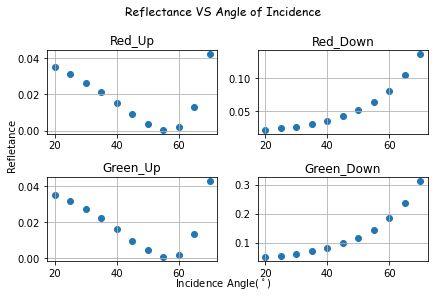

<Figure size 12000x6000 with 0 Axes>

In [110]:
df3 = df1.iloc[:-3] # eliminate 90 degree data set
print(df3)
plt.clf()
csfont = {'fontname':'Comic Sans MS'}
# set up ploting figure
fig, axs = plt.subplots(2, 2)
plt.figure(figsize=(10,5), dpi=1200)
fig.suptitle("Reflectance VS Angle of Incidence", **csfont)
fig.text(0.5, 0.01, 'Incidence Angle($^\circ$)', ha='center')
fig.text(0.001, 0.5, 'Refletance', va='center', rotation='vertical')

axs[0,0].scatter(df3["theta"], df3["ru_nor_rf"])
axs[0,0].set_title("Red_Up")
axs[0,1].scatter(df3["theta"], df3["rd_nor_rf"])
axs[0,1].set_title("Red_Down")
axs[1,0].scatter(df3["theta"], df3["gu_nor_rf"])
axs[1,0].set_title("Green_Up")
axs[1,1].scatter(df3["theta"], df3["gd_nor_rf"])
axs[1,1].set_title("Green_Down")
axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
fig.tight_layout()


fig.savefig('ref_ang.jpg', bbox_inches = 'tight', dpi=1000)

5. Find fiting fresnel equation

In [111]:
def fresnel_pd_equ(th, n, mul, c):
    """
    Fresnel equation for perpendicular polarization, with input of th for incident angle theta,
    n for index of reflectance, mul for multiplyer, c for constant to add to the function.
    """
    num = np.cos(th) - np.sqrt(n**2 - np.sin(th)**2)
    den = np.cos(th) + np.sqrt(n**2 - np.sin(th)**2)
    return((num/den)**2)*mul + c

def fresnel_pl_equ(th, n, mul, c):
    """
    Fresnel equation for parallel polarization, with input of th for incident angle theta,
    n for index of reflectance, mul for multiplyer, c for constant to add to the function.
    """
    num = np.cos(th)*n**2 - np.sqrt(n**2 - np.sin(th)**2)
    den = np.cos(th)*n**2 + np.sqrt(n**2 - np.sin(th)**2)
    return((num/den)**2)*mul + c

def fit(f,x,y):
    popt, pcov = curve_fit(f,x,y, bounds=[(1,0,-0.1),(1.7,2,0.1)],p0=[1,1,0])
    return popt, pcov


In [131]:
# convert theta in degree to radian
x_data = []
for a in df3["theta"]:
    x_data.append(math.radians(a))
ru_y = df3["ru_nor_rf"].to_numpy()
rd_y = df3["rd_nor_rf"].to_numpy()
gu_y = df3["gu_nor_rf"].to_numpy()
gd_y = df3["gd_nor_rf"].to_numpy()

ru_fit = fit(fresnel_pl_equ, x, ru_y)
rd_fit = fit(fresnel_pd_equ, x, rd_y)
gu_fit = fit(fresnel_pl_equ, x, gu_y)
gd_fit = fit(fresnel_pd_equ, x, gd_y)

def ru_theo(x):
    # theoretical red light with polarized Up
    return fresnel_pl_equ(x, ru_fit[0][0], ru_fit[0][1], ru_fit[0][2])

def rd_theo(x):
    # theoretical red light with polarized down 
    return fresnel_pd_equ(x, rd_fit[0][0], rd_fit[0][1], rd_fit[0][2])

def gu_theo(x):
    # theoretical green light with polarized Up
    return fresnel_pl_equ(x, gu_fit[0][0], gu_fit[0][1], gu_fit[0][2])

def gd_theo(x):
    # theoretical green light with polarized down
    return fresnel_pd_equ(x, gd_fit[0][0], gd_fit[0][1], gd_fit[0][2])



print("parameter={}".format(ru_fit[0]))
print("std={}".format(np.sqrt(np.diag(ru_fit[1]))))

parameter=[1.51099223e+00 9.98040664e-01 2.17014507e-04]
std=[4.59216406e-04 1.80263606e-03 3.92798249e-05]


6. plot fitted fresnel equation with data.

C:\Users\alber\AppData\Local\Temp/ipykernel_24432/4064015867.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1,l2], labels=["fit_line","data_point"],


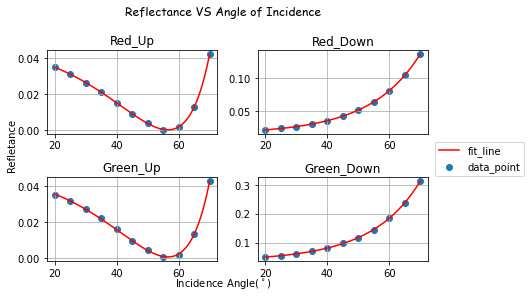

<Figure size 12000x6000 with 0 Axes>

In [148]:
# set x prediction in radian
xp = np.linspace(20,70,1000)
xp_radian = []
for a in xp:
    xp_radian.append(math.radians(a)) 

# set up plot with subplot
fig, axs = plt.subplots(2,2)
plt.figure(figsize=(10,5), dpi=1200)
fig.suptitle("Reflectance VS Angle of Incidence", **csfont)
fig.text(0.5, 0.01, 'Incidence Angle($^\circ$)', ha='center')
fig.text(0.001, 0.5, 'Refletance', va='center', rotation='vertical')

# plot data with fitted line
l1 = axs[0,0].plot(xp, ru_theo(xp_radian), "r")
l2 = axs[0,0].scatter(df3["theta"], df3["ru_nor_rf"])
axs[0,0].set_title("Red_Up")
axs[0,1].plot(xp, rd_theo(xp_radian), "r")
axs[0,1].scatter(df3["theta"], df3["rd_nor_rf"])
axs[0,1].set_title("Red_Down")
axs[1,0].plot(xp, gu_theo(xp_radian), "r")
axs[1,0].scatter(df3["theta"], df3["gu_nor_rf"])
axs[1,0].set_title("Green_Up")
axs[1,1].plot(xp, gd_theo(xp_radian), "r")
axs[1,1].scatter(df3["theta"], df3["gd_nor_rf"])
axs[1,1].set_title("Green_Down")

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
fig.tight_layout()

# add legend
fig.legend([l1,l2], labels=["fit_line","data_point"],
           loc="center right", borderaxespad=0.1, bbox_to_anchor = (1.2, 0.45))

fig.savefig('ref_ang_fit.jpg', bbox_inches = 'tight', dpi=1000)